#Dog Emotion Classification Prediction
Ariann Fernando Arriaga Alcántara A01703556

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556"
!ls

/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556
DogEmotionClassificationModel_A01703556.ipynb  files			     test
DogEmotionPrediction.ipynb		       modelClassificationDog.h5     train
ExamplesPredict				       modelClassificationDog.keras  validation


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

In [5]:
model = load_model('modelClassificationDog.h5')

In [6]:
model2 = load_model('modelClassificationDog.keras')

In [14]:
path = "ExamplesPredict"

labels = ["Angry", "Happy", "Sad"]
images = []
predictions = []

for item in os.listdir(path):
    img_path = os.path.join(path, item)
    image = tf.keras.utils.load_img(img_path, target_size=(150, 150))
    images.append(image)
    image = np.array(image)
    image = image / 255.0
    image = image.reshape(1, 150, 150, 3)
    predict = model.predict(image)
    predict = np.argmax(predict)
    predictions.append(labels[predict])
    print(labels[predict])

1/1 [==============================] - 0s 266ms/step
Angry
1/1 [==============================] - 0s 273ms/step
Angry
1/1 [==============================] - 0s 290ms/step
Sad
1/1 [==============================] - 0s 255ms/step
Happy


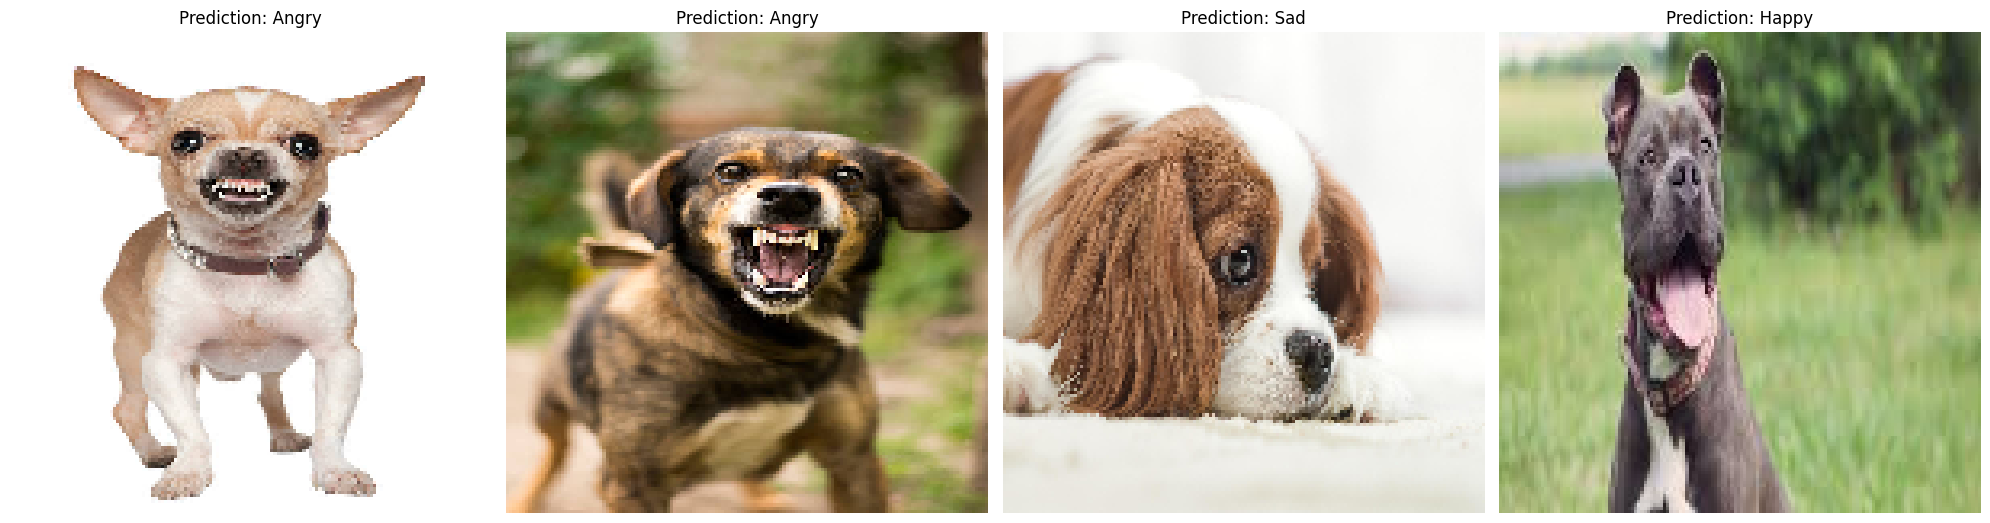

In [15]:
fig = plt.figure(figsize=(20, 20))
num_images = len(images)
# Recorrer y mostrar cada imagen con su predicción
for i in range(num_images):
    ax = fig.add_subplot(1, num_images, i + 1)
    ax.imshow(images[i])
    ax.set_title(f"Prediction: {predictions[i]}")
    ax.axis('off')  # Ocultar los ejes para una visualización más limpia

fig.tight_layout()
plt.show()